# Khipus.ai
## Unsupervised Learning
## Clustering Algorithms
## Case Study
<span>© Copyright Notice 2025, Khipus.ai - All Rights Reserved.</span>

## Import the relevant libraries

In [11]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Load the data

In [12]:
# Load the dataset
file_path = 'Wholesale_customers_data.csv'
data = pd.read_csv(file_path)
# Displaying the first few rows
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


## Plot the data

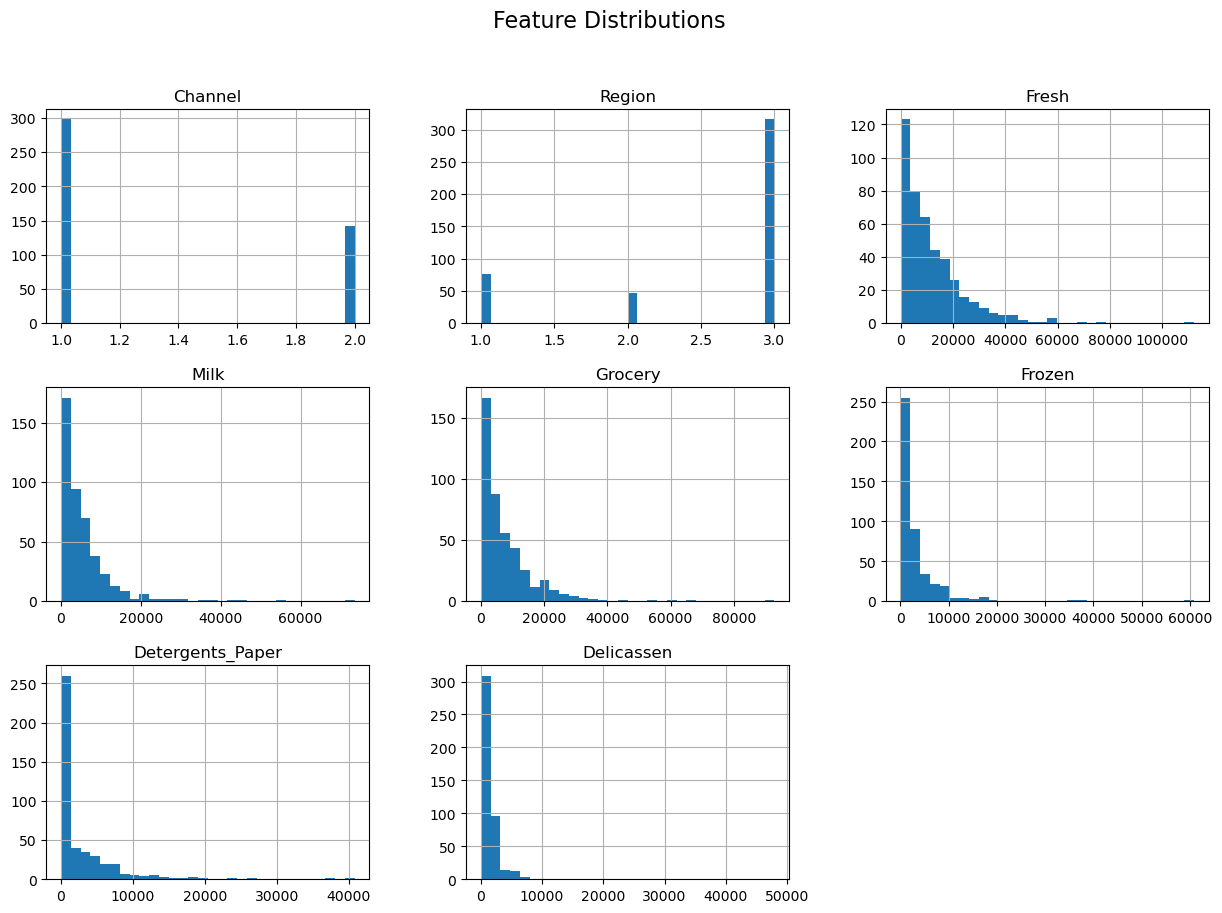

In [13]:
# Exploring basic distributions
data.hist(bins=30, figsize=(15, 10))
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

## Select the features

In [14]:
# Selecting features for clustering
features = data[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]
features.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


## Clustering

In [15]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(features)
data['Cluster'] = clusters

c:\Users\sanikj\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sanikj\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


## Clustering results

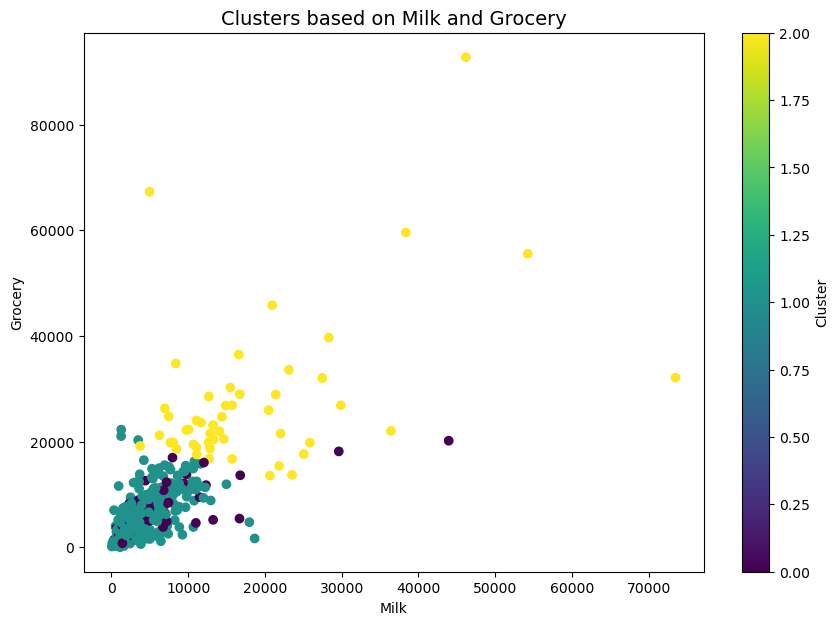

In [16]:
# Visualizing clustering results
plt.figure(figsize=(10, 7))
plt.scatter(features['Milk'], features['Grocery'], c=data['Cluster'], cmap='viridis')
plt.title('Clusters based on Milk and Grocery', fontsize=14)
plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.colorbar(label='Cluster')
plt.show()

## Standardize the variables

In [17]:
# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features = pd.DataFrame(scaled_features, columns=features.columns)
scaled_features.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


## Take advantage of the Elbow method

c:\Users\sanikj\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sanikj\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\sanikj\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sanikj\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

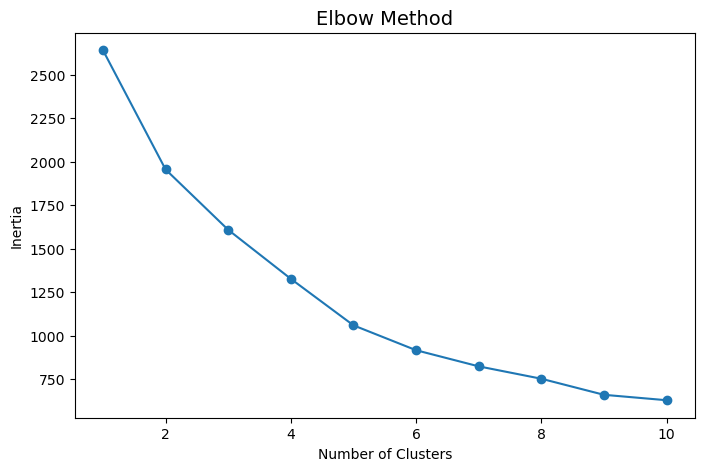

In [18]:
# Using the Elbow method to determine the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method', fontsize=14)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

## Explore clustering solutions and select the number of clusters

In [19]:
# Final clustering solution
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
final_clusters = kmeans.fit_predict(scaled_features)
data['Final Cluster'] = final_clusters
data.groupby('Final Cluster').mean()

c:\Users\sanikj\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sanikj\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
Final Cluster,,,,,,,,,
0,1.249364,2.547074,12062.913486,4115.099237,5534.966921,2940.676845,1696.170483,1299.114504,0.870229
1,1.250000,2.750000,52022.000000,31696.000000,18490.750000,29825.500000,2699.000000,19656.250000,0.500000
2,2.000000,2.488372,7705.069767,18752.069767,29054.813953,1782.837209,13731.767442,1901.534884,2.000000


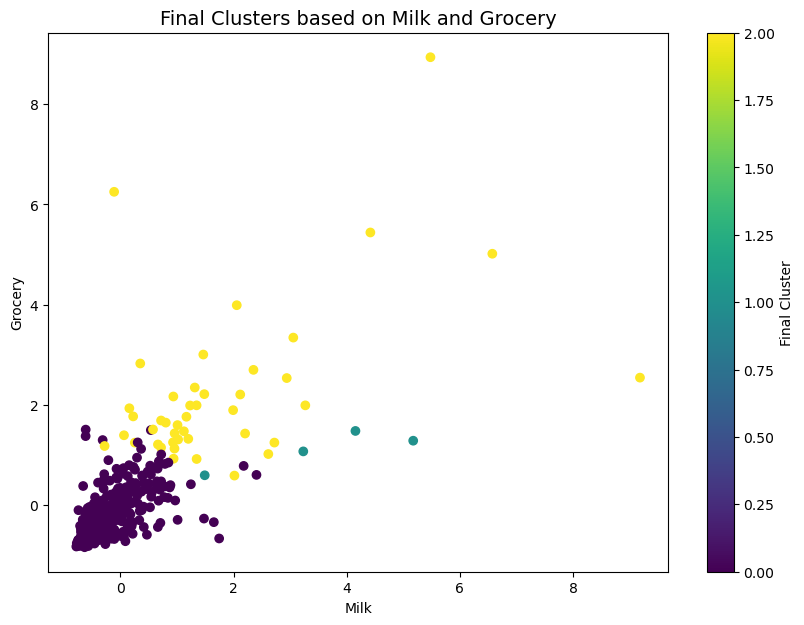

In [20]:
plt.figure(figsize=(10, 7))
plt.scatter(scaled_features['Milk'], scaled_features['Grocery'], c=data['Final Cluster'], cmap='viridis')
plt.title('Final Clusters based on Milk and Grocery', fontsize=14)
plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.colorbar(label='Final Cluster')
plt.show()